<h1 align="center"><font size="6"><strong>Analyzing the Landscape of Diabetes : Insights from the BRFSS 2021 Dataset</strong></font></h1> 

------------------------------------------------

## Anggota Kelompok
1. X
2. X
3. X
4. X


---

## 1. Overview (Perkenalan)
#### **Latar Belakang**
Diabetes, sebagai masalah kesehatan global, meningkatkan perhatian karena dampak kronisnya. Tipe 1, tipe 2, dan gestasional adalah varian utama dengan karakteristik berbeda. Prevalensi diabetes di AS meningkat dari 2010 hingga 2021, mendorong analisis menggunakan metode klasifikasi Decision Tree. Harapannya, analisis ini memberikan wawasan mendalam tentang faktor risiko dan kontribusi pada diabetes, mendukung upaya pencegahan, manajemen, dan pemahaman kondisi ini dalam masyarakat.

#### **Dataset**
Dataset yang digunakan untuk analisis ini adalah "Diabetes Health Indicators Dataset", diunduh dari Kaggle [di sini](https://www.kaggle.com/datasets/julnazz/diabetes-health-indicators-dataset).

Dataset ini adalah hasil dari Behavioral Risk Factor Surveillance System (BRFSS) 2021, sebuah survei telepon berbasis negara yang mengumpulkan data tentang perilaku risiko kesehatan, kondisi kesehatan kronis, dan penggunaan layanan pencegahan di kalangan orang dewasa di Amerika Serikat. Dataset ini terdiri dari 22 atribut dan 236.378 baris. Variabel targetnya adalah  Diabetes_012 yang memiliki 3 kelas: 0 untuk tidak ada diabetes atau hanya selama kehamilan, 1 untuk prediabetes, dan 2 untuk diabetes.

#### **Objective yang Ingin Dicapai**
Objective yang ingin dicapai dalam analisis ini yaitu:

- Menganalisis hubungan antara faktor-faktor risiko yang terdapat dalam dataset dengan tingkat diabetes.

- Menerapkan metode klasifikasi Decision Tree pada dataset untuk membuat model yang dapat mengklasifikasikan responden menjadi kelompok diabetes yang berbeda.

## 2. Import Library yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

## 3. Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

In [2]:
df = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2021.csv")

In [3]:
pd.set_option("display.max_columns", None)

## 4. Exploratory data analysis
Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [4]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,1,0,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,0,0,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,1,0,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,0,0,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [5]:
df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
236373,2.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,1,0,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0.0,1,0.0,1,25.0,1.0,0.0,0.0,1,1,1,0,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0.0,0,1.0,1,31.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0.0,1,0.0,1,24.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0
236377,0.0,0,1.0,1,32.0,0.0,0.0,0.0,1,0,0,0,1,0.0,1.0,2.0,2.0,0.0,0,6,6.0,6.0


In [6]:
df.shape

(236378, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [8]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
df.isnull().values.any()

False

In [10]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.307791,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,0.827767,0.062083,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.705037,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,0.377583,0.241306,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [11]:
for col in df.columns:
    print(col,':', df[col].nunique())

Diabetes_012 : 3
HighBP : 2
HighChol : 2
CholCheck : 2
BMI : 84
Smoker : 2
Stroke : 2
HeartDiseaseorAttack : 2
PhysActivity : 2
Fruits : 2
Veggies : 2
HvyAlcoholConsump : 2
AnyHealthcare : 2
NoDocbcCost : 2
GenHlth : 5
MentHlth : 31
PhysHlth : 31
DiffWalk : 2
Sex : 2
Age : 13
Education : 6
Income : 11


## 5. Data Cleaning
Bagian ini mencakup langkah-langkah persiapan data sebelum melanjutkan eksplorasi lebih lanjut. Tahap pembersihan data melibatkan tindakan-tindakan seperti memberikan nama baru pada setiap kolom, menangani nilai yang hilang, menghilangkan kolom yang tidak relevan, dan langkah-langkah lain untuk memastikan kebersihan dan keteraturan data sebelum dilakukan analisis lebih lanjut.

In [12]:
df.duplicated().sum()

12828

In [13]:
df = df.drop_duplicates()

In [14]:
drop_cols = ['CholCheck', 'HeartDiseaseorAttack', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Education', 'Income']

In [15]:
df = df.drop(drop_cols, axis=1)
df.head()

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,PhysActivity,Fruits,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age
0,0.0,0,1.0,15.0,1.0,0.0,0,1,0,10.0,20.0,0,11
1,2.0,1,0.0,28.0,0.0,0.0,0,1,0,0.0,0.0,0,11
2,2.0,1,1.0,33.0,0.0,0.0,1,1,0,10.0,0.0,0,9
3,2.0,0,1.0,29.0,0.0,1.0,1,1,0,0.0,30.0,1,12
4,0.0,0,0.0,24.0,1.0,0.0,0,0,0,0.0,0.0,1,13


In [16]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth',
       'Sex', 'Age'],
      dtype='object')

In [17]:
df.max(axis=0)['Age']

13.0

In [18]:
df.min(axis=0)['Age']

1.0

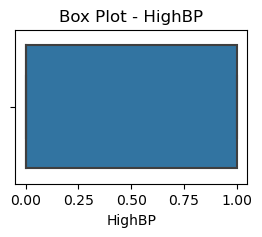

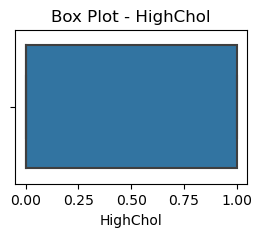

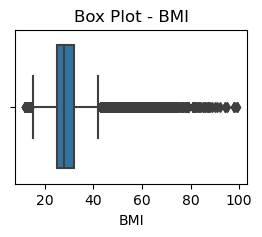

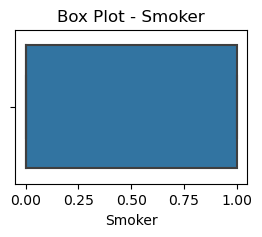

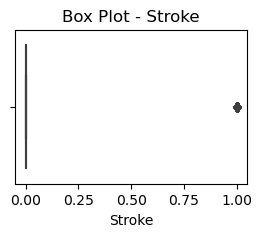

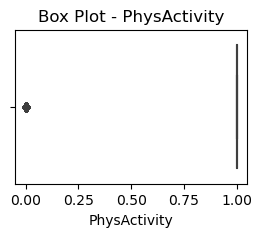

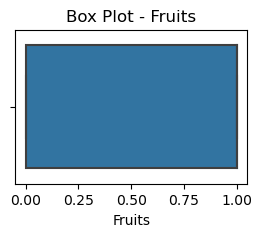

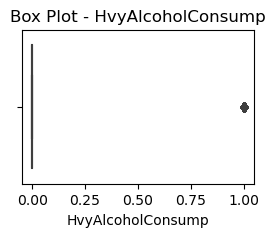

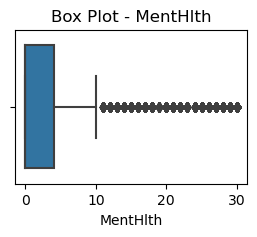

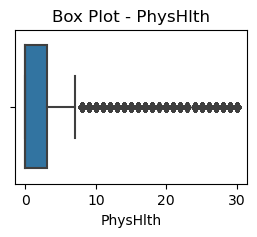

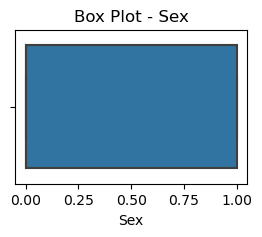

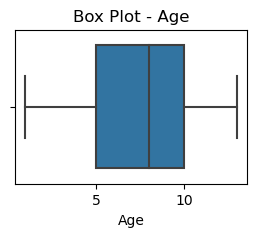

In [19]:
def visualize_outliers(df, columns):
    for column in columns:
        plt.figure(figsize=(3, 2))
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot - {column}')
        plt.show()

# Visualisasi outlier pada kolom tertentu
columns_to_visualize = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'Sex', 'Age']
visualize_outliers(df, columns_to_visualize)

In [20]:
def remove_outliers_iqr(df, columns):
    df2 = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
    return df2

In [21]:
columns_to_clean = ['MentHlth', 'PhysHlth', 'BMI']
df2 = remove_outliers_iqr(df, columns_to_clean)

## 6. Visualisasi dan Analisis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


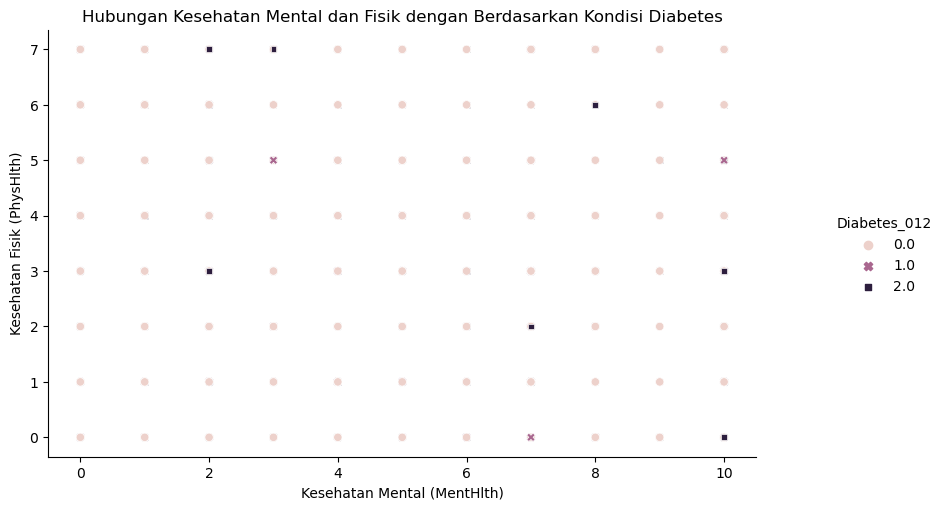

In [22]:
g=sns.relplot(x='MentHlth', y='PhysHlth', data=df2, hue='Diabetes_012', style='Diabetes_012')
g.fig.set_size_inches(10,5)
plt.xlabel('Kesehatan Mental (MentHlth)')
plt.ylabel('Kesehatan Fisik (PhysHlth)')
plt.title('Hubungan Kesehatan Mental dan Fisik dengan Berdasarkan Kondisi Diabetes')
plt.show()

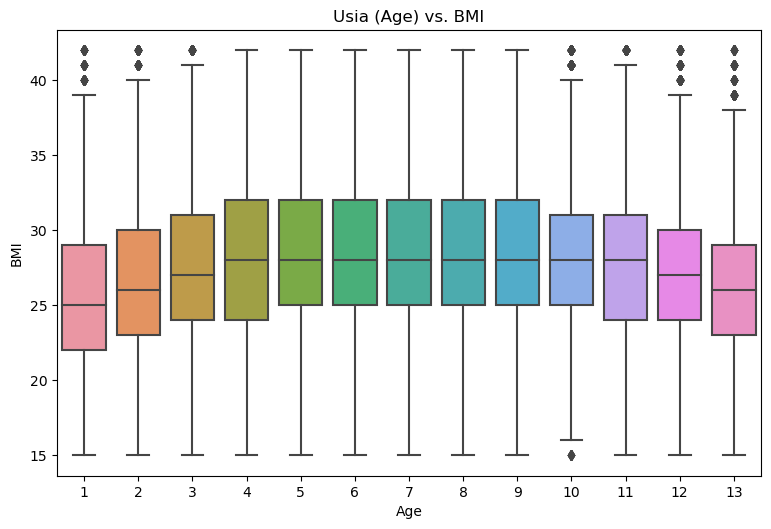

In [23]:
plt.figure(figsize=(15, 10))

# Box plot Usia (Age) vs. BMI
plt.subplot(2, 2, 1)
sns.boxplot(x='Age', y='BMI', data=df2)
plt.title('Usia (Age) vs. BMI')
plt.tight_layout()
plt.show()

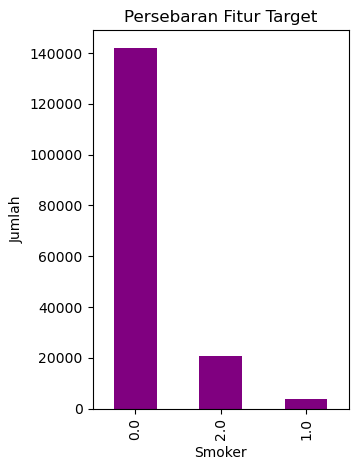

In [24]:
plt.subplot(1, 2, 2)
df2['Diabetes_012'].value_counts().plot.bar(color='purple')
plt.title('Persebaran Fitur Target')
plt.xlabel('Smoker')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

Pada fitur Diabetes_012 yang dijadika target, terlihat adanya ketidakseimbangan yang cukup signifikan pada fitur target, yaitu status diabetes. Hal ini menciptakan potensi pengaruh yang besar terhadap akurasi model yang dihasilkan. Ketidakseimbangan ini muncul ketika jumlah class 0 atau tidak ada diabetes/ hanya selama kehamilan, class 1 atau prediabetes, dan class 2 atau diabetes tidak seimbang secara proporsional.

In [25]:
df2.corr()

,Diabetes_012,HighBP,HighChol,BMI,Smoker,Stroke,PhysActivity,Fruits,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age
Diabetes_012,1.000000,0.243893,0.181684,0.175518,0.040692,0.074225,-0.104128,-0.015335,-0.058148,-0.052534,0.038737,0.045433,0.201800
HighBP,0.243893,1.000000,0.264349,0.202961,0.081397,0.111429,-0.091093,-0.014886,-0.004783,-0.081495,0.041764,0.069313,0.351436
HighChol,0.181684,0.264349,1.000000,0.088839,0.064293,0.071974,-0.044759,-0.010560,-0.015311,-0.037361,0.044216,0.028671,0.287807
BMI,0.175518,0.202961,0.088839,1.000000,0.008310,0.003412,-0.110692,-0.077997,-0.032762,-0.002135,0.040727,0.069159,-0.023602
Smoker,0.040692,0.081397,0.064293,0.008310,1.000000,0.039736,-0.057183,-0.053692,0.096635,-0.020831,0.007759,0.086043,0.132590
Stroke,0.074225,0.111429,0.071974,0.003412,0.039736,1.000000,-0.045391,0.007519,-0.013758,-0.018241,0.034680,0.003976,0.127779
PhysActivity,-0.104128,-0.091093,-0.044759,-0.110692,-0.057183,-0.045391,1.000000,0.100752,0.014412,0.038765,-0.039000,0.041731,-0.105617
Fruits,-0.015335,-0.014886,-0.010560,-0.077997,-0.053692,0.007519,0.100752,1.000000,-0.035904,-0.020183,-0.002727,-0.064482,0.072243
HvyAlcoholConsump,-0.058148,-0.004783,-0.015311,-0.032762,0.096635,-0.013758,0.014412,-0.035904,1.000000,0.030894,-0.016511,-0.011241,-0.041820
MentHlth,-0.052534,-0.081495,-0.037361,-0.002135,-0.020831,-0.018241,0.038765,-0.020183,0.030894,1.000000,0.139635,-0.107950,-0.237140


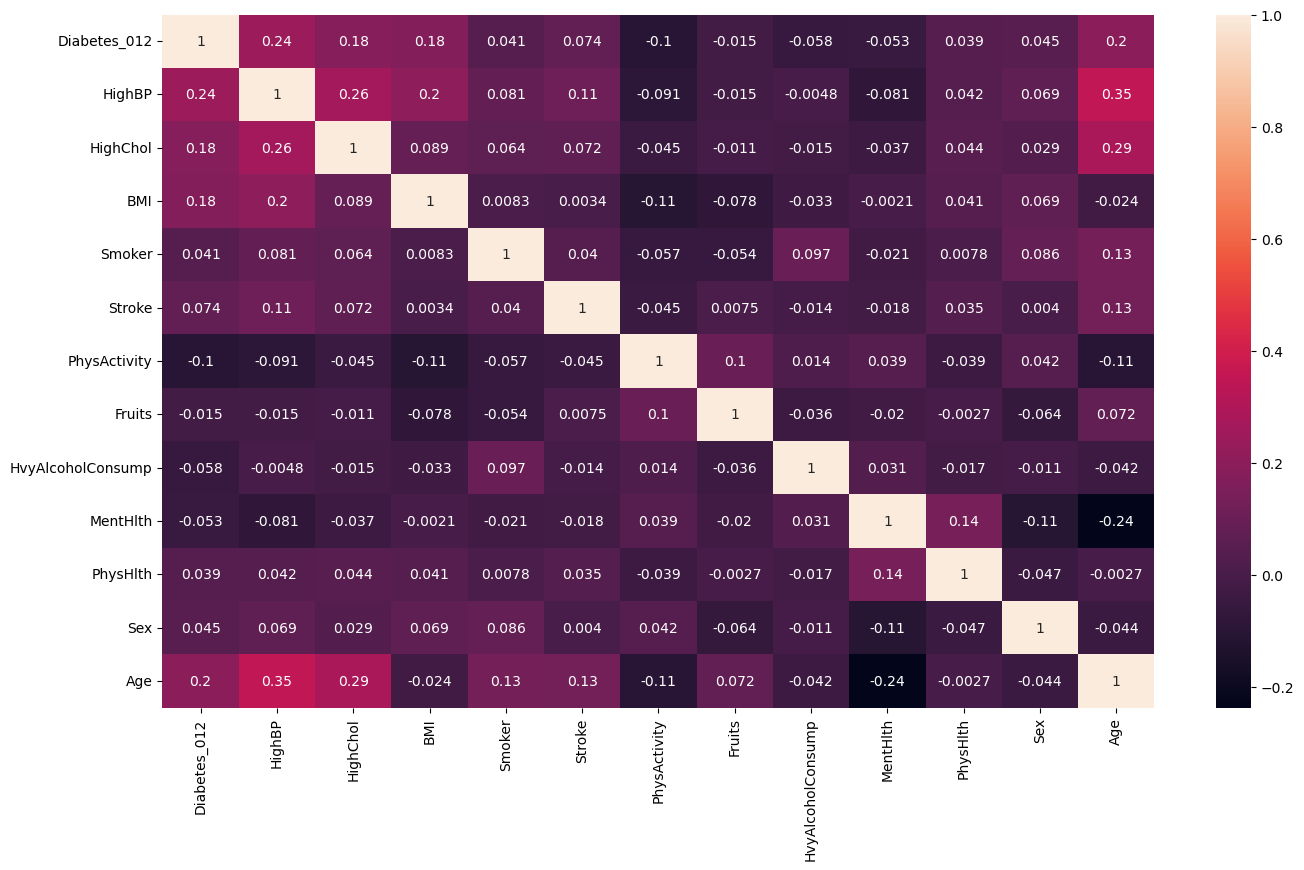

In [26]:
plt.figure(figsize=(16, 9))
sns.heatmap(df2.corr(), annot=True)
plt.show()

## 7. Declare feature vector dan target variable

In [27]:
X=df2.drop('Diabetes_012', axis=1)
y=df2['Diabetes_012']

In [28]:
X.head()

,HighBP,HighChol,BMI,Smoker,Stroke,PhysActivity,Fruits,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age
1,1,0.0,28.0,0.0,0.0,0,1,0,0.0,0.0,0,11
2,1,1.0,33.0,0.0,0.0,1,1,0,10.0,0.0,0,9
4,0,0.0,24.0,1.0,0.0,0,0,0,0.0,0.0,1,13
7,0,0.0,24.0,0.0,0.0,0,0,0,0.0,0.0,1,12
8,1,1.0,30.0,0.0,0.0,0,1,0,0.0,0.0,0,7


In [29]:
y.head()

1    2.0
2    2.0
4    0.0
7    2.0
8    0.0
Name: Diabetes_012, dtype: float64

## 8.Feature Engineering
Feature Engineering adalah proses mengubah data mentah menjadi fitur-fitur yang berguna untuk membantu memahami model lebih baik dan meningkatkan kemampuannya untuk melakukan prediksi.

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y= le.fit_transform(y)
y

array([2, 2, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

print(f"The shape of X_train is: {X_train.shape}")
print(f"The shape of X_test is: {X_test.shape}")
print(f"The shape of y_train is: {y_train.shape}")
print(f"The shape of y_test is: {y_test.shape}")

The shape of X_train is: (111434, 12)
The shape of X_test is: (54886, 12)
The shape of y_train is: (111434,)
The shape of y_test is: (54886,)


## 9. Decision Tree Classifier dengan kriteria entropy

In [32]:
model1 = DecisionTreeClassifier(criterion='entropy', random_state=5)
model1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=5)

In [33]:
# Prediksi menggunakan Model 1
pred_train_model1 = model1.predict(X_train)
cm_model1 = confusion_matrix(y_train, pred_train_model1)

In [34]:
# Menampilkan hasil Model 1
print("=== Model 1: Decision Tree (Entropy) ===")
print(f"Confusion Matrix:\n{cm_model1}")
print(f"Accuracy: {accuracy_score(y_train, pred_train_model1)}")
print("\n")

=== Model 1: Decision Tree (Entropy) ===
Confusion Matrix:
[[94688     4   395]
 [ 1422  1046    60]
 [ 7212    45  6562]]
Accuracy: 0.9179963027442253




## 10. Evaluasi Model

In [35]:
# Evaluasi Model pada Data Pengujian
pred_test_model1 = model1.predict(X_test)
cm_model1 = confusion_matrix(y_test, pred_test_model1)
accuracy_model1 = accuracy_score(y_test, pred_test_model1)
precision_model1 = precision_score(y_test, pred_test_model1, average="micro")
recall_model1 = recall_score(y_test, pred_test_model1, average="micro")
f1_model1 = f1_score(y_test, pred_test_model1, average="micro")


print("=== Evaluation on Test Data ===")
print(f"Confusion Matrix:\n{cm_model1}")
print(f"Accuracy: {accuracy_model1:.4f}")
print(f"Precision: {precision_model1:.4f}")
print(f"Recall: {recall_model1:.4f}")
print(f"F1 Score: {f1_model1:.4f}")

=== Evaluation on Test Data ===
Confusion Matrix:
[[43372   554  2852]
 [ 1102    29   148]
 [ 5695   120  1014]]
Accuracy: 0.8092
Precision: 0.8092
Recall: 0.8092
F1 Score: 0.8092


## 11. Kesimpulan
Berikut adalah kesimpulan berdasarkan evaluasi model Decision Tree pada data uji:

1. **Model 1: Decision Tree (Entropy)**
   - Akurasi: 91.80%
   - Model ini memiliki akurasi yang tinggi, dengan kemampuan yang baik dalam mengklasifikasikan setiap kelas.
   - Confusion Matrix menunjukkan bahwa model dapat mengidentifikasi dengan baik sebagian besar kelas.

2. **Evaluasi pada Data Uji**
   - Akurasi: 80.92%
   - Precision, Recall, dan F1 Score: 80.92%
   - Meskipun akurasi model tinggi, perlu diperhatikan bahwa performa model lebih rendah dalam mengklasifikasikan beberapa kelas, terutama kelas minoritas.

---
- Model Decision Tree dengan kriteria entropy menunjukkan performa yang baik dengan akurasi yang tinggi pada data pelatihan.
- Pada data uji, model memiliki akurasi yang tetap tinggi, tetapi perlu diperhatikan bahwa evaluasi lebih mendalam (precision, recall, dan F1 Score) menunjukkan beberapa tantangan dalam mengklasifikasikan kelas minoritas.
- Perlu dipertimbangkan untuk mengoptimalkan model, mempertimbangkan teknik resampling atau penyesuaian parameter lebih lanjut untuk meningkatkan kinerja pada kelas yang kurang seimbang.